# Import required Libraries

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Load Dataset

In [349]:
car_data = pd.read_csv('car data.csv')
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [351]:
car_data.head()
print("\n\033[1m"+"Information of the Dataset:"+"\033[0m")
car_data.info()
print("\n\033[1m"+"Count of null values in each column:"+"\033[0m")
print(car_data.isnull().sum())
print("\n\033[1m"+"Overall value description of the Dataset:"+"\033[0m")
print(car_data.describe())
print("\n\033[1m"+"Columns of the dataset:"+"\033[0m")
car_data.columns


Information of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Count of null values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Overall value description of the Dataset:
              Year  Selling_Price  Present_Price     Km

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Value counts for Categorical Columns

In [353]:
print("\033[1mFuel Type Value Counts:\033[0m")
print(car_data['Fuel_Type'].value_counts(), "\n")

print("\033[1mSeller Type Value Counts:\033[0m")
print(car_data['Seller_Type'].value_counts(), "\n")

print("\033[1mTransmission Value Counts:\033[0m")
print(car_data['Transmission'].value_counts())

Fuel Type Value Counts:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 

Seller Type Value Counts:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 

Transmission Value Counts:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Visualization of Categorical Data

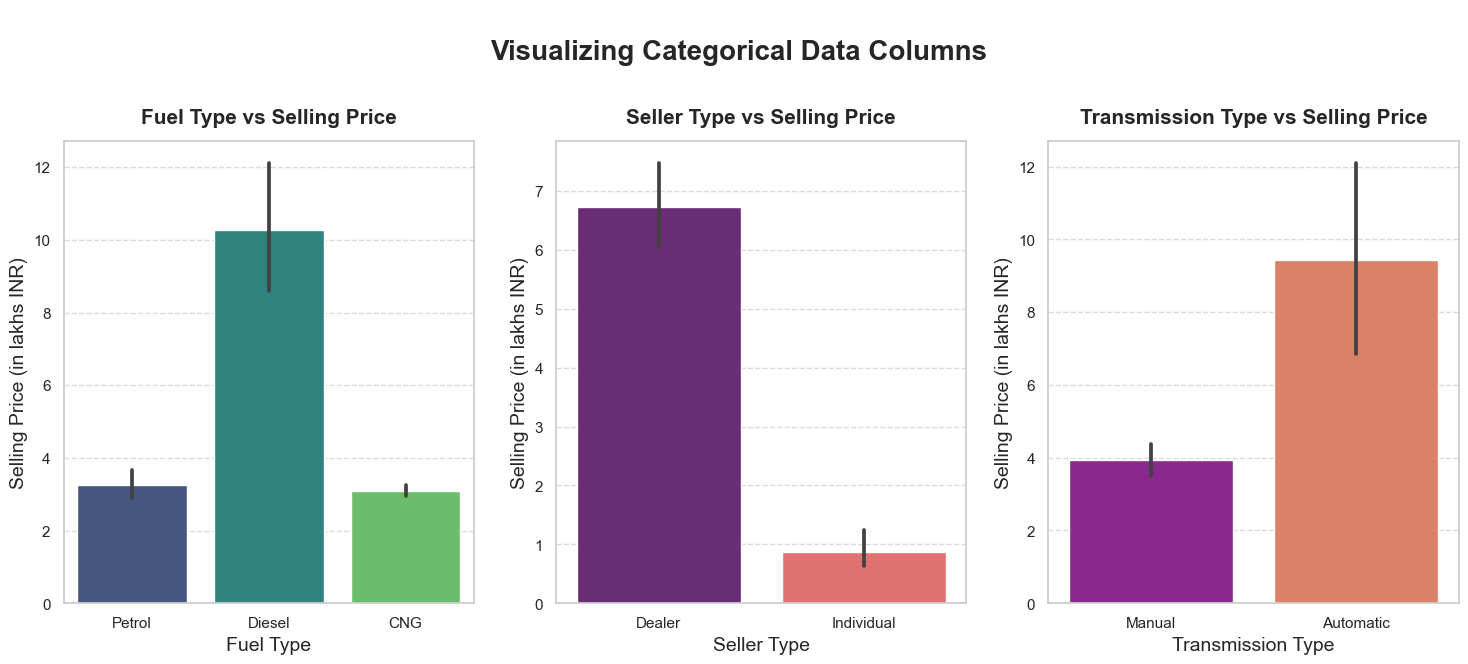

In [355]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']
sns.set_theme(style="whitegrid")  

plt.figure(figsize=(18, 6))  
plt.suptitle('\nVisualizing Categorical Data Columns', fontsize=20, fontweight='bold', y=1.1)  

# Subplot 1: Fuel Type vs Selling Price
plt.subplot(1, 3, 1)
sns.barplot(x=fuel_type, y=selling_price, palette='viridis') 
plt.title('Fuel Type vs Selling Price', fontsize=15, fontweight='bold',y=1.02)
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("Selling Price (in lakhs INR)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Subplot 2: Seller Type vs Selling Price
plt.subplot(1, 3, 2)
sns.barplot(x=seller_type, y=selling_price, palette='magma')  # Use a different color palette
plt.title('Seller Type vs Selling Price', fontsize=15, fontweight='bold',y=1.02)
plt.xlabel("Seller Type", fontsize=14)
plt.ylabel("Selling Price (in lakhs INR)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: Transmission Type vs Selling Price
plt.subplot(1, 3, 3)
sns.barplot(x=transmission_type, y=selling_price, palette='plasma')  # Use another color palette
plt.title('Transmission Type vs Selling Price', fontsize=15, fontweight='bold',y=1.02)
plt.xlabel("Transmission Type", fontsize=14)
plt.ylabel("Selling Price (in lakhs INR)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.subplots_adjust()
plt.show()

# Descriptive Statistics

In [357]:
print("\033[1m"+"Descriptive statistics of vehicles using 'Petrol' as 'Fuel_Type':"+"\033[0m\n")
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
print(petrol_data.describe(),'\n')

print("\n\033[1m"+"Descriptive statistics of vehicles sold by 'Dealer' as 'Seller Type':"+"\033[0m\n")
seller_data = car_data.groupby('Seller_Type').get_group('Dealer') 
print(seller_data.describe())

Descriptive statistics of vehicles using 'Petrol' as 'Fuel_Type':

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   239.000000     239.000000     239.000000     239.000000  239.000000
mean   2013.539749       3.264184       5.583556   33528.937238    0.050209
std       3.042674       3.135537       5.290685   40308.984886    0.270368
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.600000       0.940000   13850.000000    0.000000
50%    2014.000000       2.650000       4.600000   25870.000000    0.000000
75%    2016.000000       5.200000       7.980000   44271.000000    0.000000
max    2017.000000      19.750000      23.730000  500000.000000    3.000000 


Descriptive statistics of vehicles sold by 'Dealer' as 'Seller Type':

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   195.000000     195.000000     195.000000     195.000000  195.000000
mean   2013.712821     

# Grouping and Encoding of Data

In [359]:
# Encoding categorical variables
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True) # Manual encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True) # One-hot encoding
car_data_numeric = car_data.drop(columns=['Car_Name']) # Drop the 'Car_Name' column before computing the correlation matrix
print("\033[1m"+"Categorical values of 'Fuel_Type', 'Seller_Type' and 'Transmission' has changed to numerical:"+"\033[0m\n")
car_data_numeric.head(10)

Categorical values of 'Fuel_Type', 'Seller_Type' and 'Transmission' has changed to numerical:



,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,False,True
1,2013,4.75,9.54,43000,1,0,False,True
2,2017,7.25,9.85,6900,0,0,False,True
3,2011,2.85,4.15,5200,0,0,False,True
4,2014,4.60,6.87,42450,1,0,False,True
5,2018,9.25,9.83,2071,1,0,False,True
6,2015,6.75,8.12,18796,0,0,False,True
7,2015,6.50,8.61,33429,1,0,False,True
8,2016,8.75,8.89,20273,1,0,False,True
9,2015,7.45,8.92,42367,1,0,False,True


# Correlation Heatmap

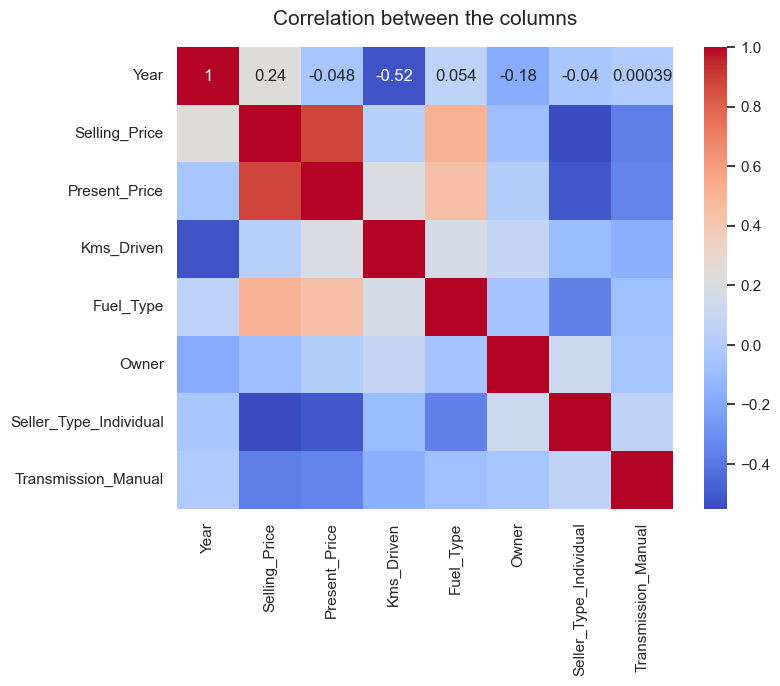

In [361]:
plt.figure(figsize=(8,6))
sns.heatmap(car_data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the columns',y=1.03,fontsize=15)
plt.show()

# Visualizing Present Price vs Selling Price

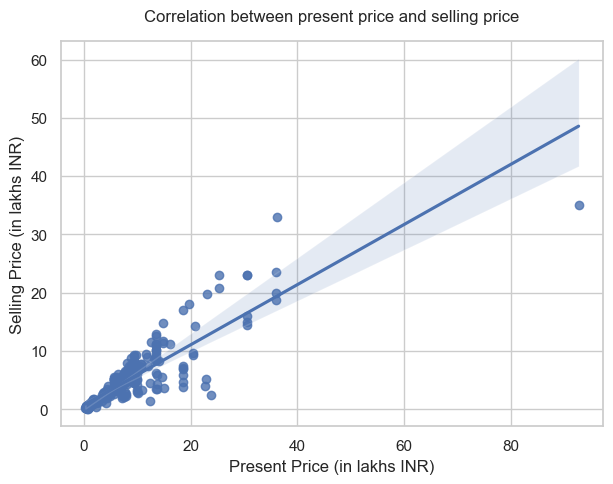

In [363]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price',y=1.03)
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.xlabel("Present Price (in lakhs INR)", fontsize=12)
plt.ylabel("Selling Price (in lakhs INR)", fontsize=12)
plt.show()

# Testing and Training of Data

In [365]:
# Splitting Data
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

#Shape of the dataframe: (Number of Rows, Number of Columns)
print("\033[1m"+"Shape of X is: "+"\033[0m", X.shape) 
print("\033[1m"+"Shape of y is: "+"\033[0m", y.shape,'\n')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\033[1m"+"X_test shape:"+"\033[0m", X_test.shape)
print("\033[1m"+"X_train shape:"+"\033[0m", X_train.shape)
print("\033[1m"+"y_test shape: "+"\033[0m", y_test.shape)
print("\033[1m"+"y_train shape:"+"\033[0m", y_train.shape,'\n')

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)  # Train the model

# Predictions
rf_pred = rf_model.predict(X_test)

# Performance Metrics for Random Forest
print("\033[1mRandom Forest Regressor Performance:\033[0m")
print("\033[1mMean Absolute Error:\033[0m", metrics.mean_absolute_error(y_test, rf_pred))
print("\033[1mMean Squared Error:\033[0m", metrics.mean_squared_error(y_test, rf_pred))
print("\033[1mR² Score:\033[0m", metrics.r2_score(y_test, rf_pred),'\n')

# Compare with Linear Regression (existing model)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Performance Metrics for Linear Regression
print("\033[1mLinear Regression Performance:\033[0m")
print("\033[1mMean Absolute Error:\033[0m", metrics.mean_absolute_error(y_test, lr_pred))
print("\033[1mMean Squared Error:\033[0m", metrics.mean_squared_error(y_test, lr_pred))
print("\033[1mR² Score:\033[0m", metrics.r2_score(y_test, lr_pred),'\n')

#Conclusion
if metrics.r2_score(y_test, lr_pred) < metrics.r2_score(y_test, rf_pred):
    print("\033[1mConclusion:\033[0m The Random Forest Regressor performs better and can be Used")
else:
    print("\033[1mConclusion:\033[0m The Linear Regression performs performs better and can be Used.")

Shape of X is:  (301, 7)
Shape of y is:  (301,) 

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,) 

Random Forest Regressor Performance:
Mean Absolute Error: 0.6277032967032968
Mean Squared Error: 1.052924072967034
R² Score: 0.9630218214547557 

Linear Regression Performance:
Mean Absolute Error: 1.258140470647337
Mean Squared Error: 3.4932860262251473
R² Score: 0.8773175030338536 

Conclusion: The Random Forest Regressor performs better and can be Used


# Actual vs Predicted Price Visualization for both models

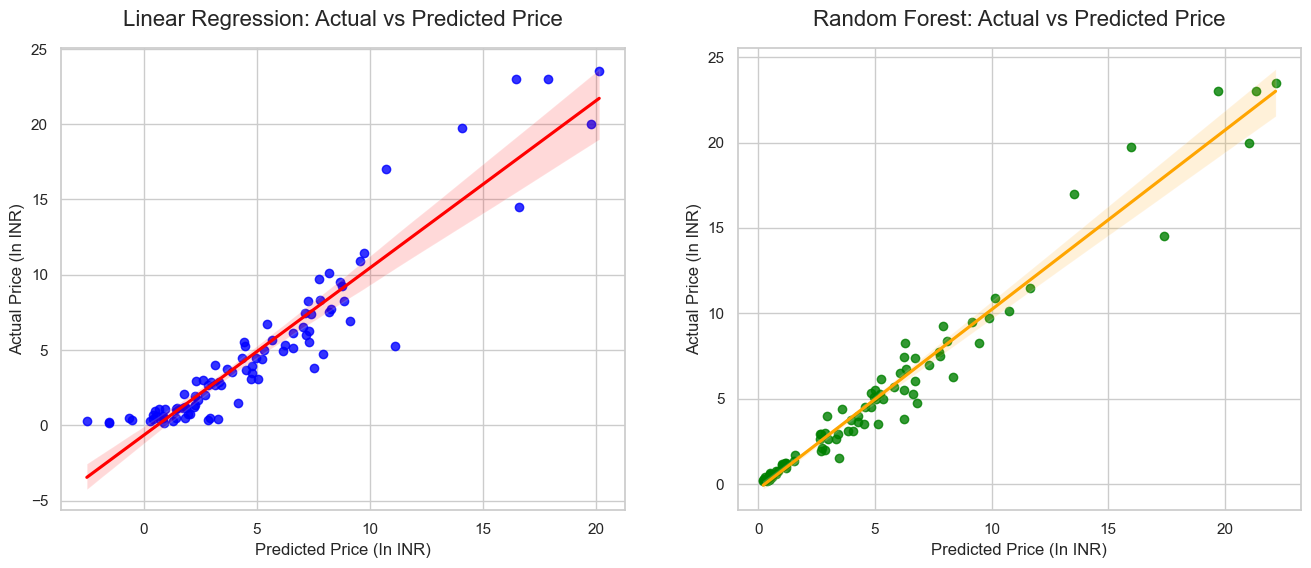

In [367]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns

# Plot for Linear Regression
sns.regplot(x=lr_pred, y=y_test, ax=axes[0], color='blue', line_kws={'color': 'red'})
axes[0].set_xlabel("Predicted Price (In INR)")
axes[0].set_ylabel("Actual Price (In INR)")
axes[0].set_title("Linear Regression: Actual vs Predicted Price",y=1.03,fontsize=16)

# Plot for Random Forest Regressor
sns.regplot(x=rf_pred, y=y_test, ax=axes[1], color='green', line_kws={'color': 'orange'})
axes[1].set_xlabel("Predicted Price (In INR)")
axes[1].set_ylabel("Actual Price (In INR)")
axes[1].set_title("Random Forest: Actual vs Predicted Price",y=1.03,fontsize=16)

# Adjust layout to fit grids properly
plt.subplots_adjust()
plt.show()